In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('train(1).csv')

In [3]:
# Turn the dateframe into training, testing, valid set
print(df1.columns.values)
df1 = df1.drop(['日期', '測站', '測項'],axis=1)
print(df1.columns.values)

['日期' '測站' '測項' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12'
 '13' '14' '15' '16' '17' '18' '19' '20' '21' '22' '23']
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23']


In [4]:
sizeof_sample = df1.shape[0]/18
sizeof_train = sizeof_sample/10*8*(24-9)
random_sample = np.arange(sizeof_sample)
np.random.shuffle(random_sample)
random_sample = random_sample.astype(int)
print(random_sample)

[ 76  79 123 187 192 143 227  36 108 209  89  12  46 236  61  73 161 212
 117  97  28  39 228  83 105  92  29 103 159 154 157 235 119 198  68 135
 168 218 158 222 226 182  69  60 170 215 202  72 140 129  78  35 205 239
  30  26  55 203  34 220  96 138 162  93 169 225 137  64 181 213 149 186
 197  62  57  53  71  54  10 238  98  88  41 118  85 114  44 112 102  66
  59 166 194 109 231 153 155 111 193  20 190  27  65 206  87   1 122  14
 189 175  38 151 156 185 177 204   8 163 232 167  42 146 110 200 171  13
 199 124 139 128 219  33 152 234 133  80 126  56 184 121  15 217 160  52
   7   2  47 148  67 145  86 179 178   0  17  37 230 229 115 196 164  18
 223 174  77  50  70  16 136  75 144 141 134  94  48 147  31 176   9 165
  81  49 201  25 214 211 237  43 188 100  90  82  99 142 180  40 191 127
 125 120  74  19   4 210 107 173  95  58 224  23   6 207 195 104   5 183
 150  24 216 208 221  91  32 130   3  84 101 132 172  11  45 106 116  63
  22  21 131 233  51 113]


In [5]:
train_set = random_sample[0:int(sizeof_sample/10*8)]
test_set = random_sample[int(sizeof_sample/10*8):int(sizeof_sample/10*9)]
valid_set = random_sample[int(sizeof_sample/10*9):int(sizeof_sample)]
print(train_set)

[ 76  79 123 187 192 143 227  36 108 209  89  12  46 236  61  73 161 212
 117  97  28  39 228  83 105  92  29 103 159 154 157 235 119 198  68 135
 168 218 158 222 226 182  69  60 170 215 202  72 140 129  78  35 205 239
  30  26  55 203  34 220  96 138 162  93 169 225 137  64 181 213 149 186
 197  62  57  53  71  54  10 238  98  88  41 118  85 114  44 112 102  66
  59 166 194 109 231 153 155 111 193  20 190  27  65 206  87   1 122  14
 189 175  38 151 156 185 177 204   8 163 232 167  42 146 110 200 171  13
 199 124 139 128 219  33 152 234 133  80 126  56 184 121  15 217 160  52
   7   2  47 148  67 145  86 179 178   0  17  37 230 229 115 196 164  18
 223 174  77  50  70  16 136  75 144 141 134  94  48 147  31 176   9 165
  81  49 201  25 214 211 237  43 188 100  90  82]


In [35]:
# Form the Modell
# y = w0[]* x0[] + w1[] * x1[] + ...+w18[] * x18[] + b

# Lossfunction
# L = sum|y-y'|^2

# Initial
L0 = 100
L1 = 0
count = 1
w = np.random.random([18,9])
b = np.random.rand(1)
dL_dw_sum = np.zeros([18,9])
dL_db_sum = 0
L_recoard = []

learning_rate = 1

In [36]:
## Loop Sum
while (np.abs(L0-L1) > 1e-2):
    L0 = L1
    L1 = 0
    dL_dw = np.zeros([18,9])
    dL_db = 0
    # Loop for days
    for i in train_set:
        # Loop for houers
        for j in range(9,24):
            x = (df1.iloc[i*18:(i+1)*18,j-9:j]).values
            for k in range(9):
                if x[10,k] == 'NR':
                    x[10,k] = 0
            x = x.astype(np.float64)
            y = float(df1.iloc[i*18+9,j]) 
            # Cauculationf the loss
            y_p = (x*w).sum().sum()+b
            L1 +=  np.square(y-y_p)
            # Cauculating the Gradient
            dL_dw += 2*(y_p-y)*x
            dL_db += float(2*(y_p-y))
    L1 = L1/sizeof_train;
    dL_dw = dL_dw/sizeof_train;
    dL_db = dL_db/sizeof_train;
    L_recoard.append(float(L1))
    dL_dw_sum = np.sqrt(dL_dw_sum**2 + dL_dw**2)
    dL_db_sum = np.sqrt(dL_db_sum**2 + dL_db**2)
    w -= dL_dw*learning_rate/dL_dw_sum
    b -= dL_db*learning_rate/dL_db_sum  
    print('In %d Loop, Error is %f.\n'%(count,L1))
    #print(dL_dw,dL_db)
    count += 1
    if count%20 == 0:
        dL_dw_sum /= 2**0.5
        dL_db_sum /= 2**0.5

In 1 Loop, Error is 8287678.347814.

In 2 Loop, Error is 6563521.990763.

In 3 Loop, Error is 1119065.740512.

In 4 Loop, Error is 152459.877707.

In 5 Loop, Error is 25116.027337.

In 6 Loop, Error is 8784.521362.

In 7 Loop, Error is 6520.767171.

In 8 Loop, Error is 6043.040665.

In 9 Loop, Error is 5803.828510.

In 10 Loop, Error is 5607.173832.

In 11 Loop, Error is 5427.265475.

In 12 Loop, Error is 5259.814710.

In 13 Loop, Error is 5103.349656.

In 14 Loop, Error is 4956.849928.

In 15 Loop, Error is 4819.438132.

In 16 Loop, Error is 4690.331277.

In 17 Loop, Error is 4568.826075.

In 18 Loop, Error is 4454.289525.

In 19 Loop, Error is 4346.151063.

In 20 Loop, Error is 4243.895696.

In 21 Loop, Error is 4107.708158.

In 22 Loop, Error is 3981.348268.

In 23 Loop, Error is 3863.768409.

In 24 Loop, Error is 3754.055771.

In 25 Loop, Error is 3651.412732.

In 26 Loop, Error is 3555.140359.

In 27 Loop, Error is 3464.624486.

In 28 Loop, Error is 3379.323962.

In 29 Loop, Error

KeyboardInterrupt: 

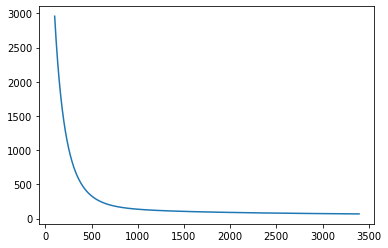

In [13]:
import matplotlib.pyplot as plt
Loop_number = np.arange(len(L_recoard))+1
plt.plot(Loop_number[100:],L_recoard[100:])


In [15]:
## Test
L_test = 0
sizeof_test = sizeof_sample/10*(24-9)
for i in test_set:
    # Loop for houers
    for j in range(9,24):
        x = (df1.iloc[i*18:(i+1)*18,j-9:j]).values
        for k in range(9):
            if x[10,k] == 'NR':
                x[10,k] = 0
        x = x.astype(np.float64)
        y = float(df1.iloc[i*18+9,j]) 
        # Cauculationf the loss
        y_p = (x*w).sum().sum()+b
        L_test +=  np.square(y-y_p)
L_test = L_test/sizeof_test
print(L_test)

[123.82821269]


4